In [22]:
%matplotlib inline
import numpy as np

Loading data
=====================================================
We will work with "Parkinsons Telemonitoring" dataset of the University of Oxford. The original study used a range of linear regression methods to predict the clinician's Parkinson's disease symptom score on the UPDRS scale

We load the dataset "Parkinsons Telemonitoring" using the numpy loadtxt function.

The columns are separated by ',' delimiter, which we pass to the loadtxt function.

In [13]:
data = np.loadtxt("C:/Python34/datasets/parkinsons_updrs.data",skiprows=1,delimiter=',')
#data[:5,:4]
#data[:2,:]
data[:,[0,1]]

array([[  1.,  72.],
       [  1.,  72.],
       [  1.,  72.],
       ..., 
       [ 42.,  61.],
       [ 42.,  61.],
       [ 42.,  61.]])

We want to work now with 2-dim data, in order to plot it in 3d space. Therefore we select 2 columns (attributes) from total of 12 columns.  

In this example we will select attributes "Clinician's motor UPDRS score" and "Clinician's total UPDRS score", which are 4th and 5th columns. 

In [24]:
#X = data[:, :-1]
#y = data[:, -1]

# Choose two columns from a numpy array
X = data[:,[3,4]]
y = data[:,-1]
print(X[:10, :])
print(y[:10])

[[  5.6431  28.199 ]
 [ 12.666   28.447 ]
 [ 19.681   28.695 ]
 [ 25.647   28.905 ]
 [ 33.642   29.187 ]
 [ 40.652   29.435 ]
 [ 47.649   29.682 ]
 [ 54.64    29.928 ]
 [ 61.669   30.177 ]
 [ 68.688   30.424 ]]
[ 0.16006  0.1081   0.21014  0.33277  0.19361  0.195    0.17563  0.23844
  0.20037  0.20117]


### Add noise to data

In [49]:
noise = np.random.normal(0,0.9, (len(y),2))
X = X + noise

### We shuffle examples:

In [50]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1)
print(X.shape)
print(y.shape)

(5875, 2)
(5875,)


### Now we split the data into train and test set:

In [51]:
train_set_size = np.int(X.shape[0] / 2)
print(train_set_size)
X_train = X[:train_set_size, :]  # selects first train_set_size rows (examples) for train set
X_test = X[train_set_size:, :]   # selects from row train_set_size until the last one for test set
print(X_train.shape)
print(X_test.shape)

2937
(2937, 2)
(2938, 2)


And we split the targets into train and test set in similar way as we splitted data:

In [52]:
y_train = y[:train_set_size]   # selects first 15 rows (targets) for train set
y_test = y[train_set_size:]    # selects from row 250 until the last one for test set
print(y_train.shape)
print(y_test.shape)

(2937,)
(2938,)


### Plot
Let's look at the data in the 3d plot. There is some linear relationship in the data:

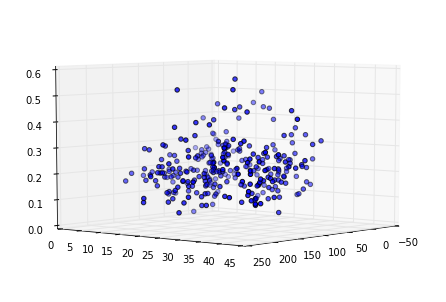

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X_train[:300, 0], X_train[:300, 1], y_train[:300])
ax.view_init(6,40)
plt.show()

Linear regression
=================
Create linear regression object, which we use later to apply linear regression on data

In [54]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


Fit the model using the training set

In [55]:
regr.fit(X_train, y_train);

We found the coefficients and the bias (the intercept)

In [56]:
print(regr.coef_)
print(regr.intercept_)

[ -3.33520120e-05   1.67392734e-03]
0.186282249129


### Mean square error
Now we calculate the mean square error on the test set

In [57]:
# The mean square error
print("Training error: ", np.mean((regr.predict(X_train) - y_train) ** 2))
print("Test     error: ", np.mean((regr.predict(X_test) - y_test) ** 2))

Training error:  0.00830183253467
Test     error:  0.00801308188006


Plotting data and linear model
==============================
Now we want to plot the train data and teachers in 3d plot (marked as dots). 

With plane we represent the data and predictions (linear model that we found).

We first scatter the 3d points using mplot3d:


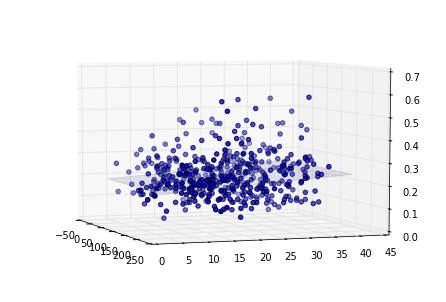

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)


ax.scatter3D(X_train[:500, 0], X_train[:500, 1], y_train[:500])    # plots 3d points, 500 is number of points which are visualized

# here we create plane which we want to plot, using the train data and predictions (you don't need to understand it)
range_x = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), num=10)
range_y = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), num=10)
xx, yy = np.meshgrid(range_x, range_y)
zz = np.vstack([xx.ravel(), yy.ravel()]).T
pred = regr.predict(zz)
pred = pred.reshape(10, 10)

ax.plot_surface(xx, yy, pred, alpha=.1)  # plots the plane
ax.view_init(6,-20)
plt.show()


Now we plot the data and the plane in similar way for test data:

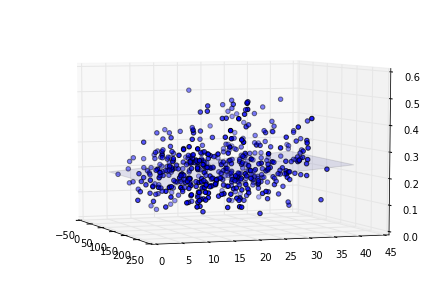

In [59]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X_test[:500, 0], X_test[:500, 1], y_test[:500])    # plots 3d points 500 is number of points which are visualized

# here we create plane which we want to plot, using the train data and predictions (you don't need to understand it)
range_x = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), num=10)
range_y = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), num=10)
xx, yy = np.meshgrid(range_x, range_y)
zz = np.vstack([xx.ravel(), yy.ravel()]).T
pred = regr.predict(zz)
pred = pred.reshape(10, 10)

ax.plot_surface(xx, yy, pred, alpha=.1)  # plots the plane
ax.view_init(6,-20)
plt.show()


Playing with this Notebook
==========================

Do linear regression on dataset named 'artifical_lin".

Try to see what happens with the error, if you change the sizes of train set and test set. 

Add noise to the data, and fit the model again. How does the error changes when you add more noise?

You add noise using normal distribution, with mean 0 and width 0.4 (you can vary this parameters).
noise = np.random.normal(0,0.4, (train_set_size,2))

Add noise to data:
X = X + noise
